# <center>Eksploracja zbioru danych `sick`</center>
### <center>16 marca 2020r.</center>
### <center>Ada Gąssowska, Paweł Koźmiński, Paulina Przybyłek</center>

## 1.Wczytanie danych

In [9]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import math


#PK: problem z wczytaniem danych - blad 403 forbidden przy normalnym wczytaniu
#PK: https://datascience.stackexchange.com/questions/49751/read-csv-file-directly-from-url-how-to-fix-a-403-forbidden-error

from io import StringIO
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}
url = "https://datahub.io/machine-learning/sick/r/sick.csv"
s = requests.get(url, headers = headers).text
df = pd.read_csv(StringIO(s))

Thyroid disease records supplied by the Garavan Institute and J. Ross Quinlan, New South Wales Institute, Syndney, Australia. 1987.

In [100]:
#from google.colab import drive
#drive.mount('/content/drive')


## 2. Wstępna analiza zbiorku - zapoznanie się z danymi

In [101]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3771 non-null float64
sex                          3622 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3403 non-null

In [103]:
print(all(np.array(df.TSH_measured=="f") == np.array(df.TSH.isna())))
print(all(np.array(df.T3_measured=="f") == np.array(df.T3.isna())))
print(all(np.array(df.TT4_measured=="f") == np.array(df.TT4.isna())))
print(all(np.array(df.T4U_measured=="f") == np.array(df.T4U.isna())))
print(all(np.array(df.FTI_measured=="f") == np.array(df.FTI.isna())))
print(all(np.array(df.TBG_measured=="f") == np.array(df.TBG.isna())))

True
True
True
True
True
True


### PK: wniosek - kolumny "_measured" nie wnoszą informacji, bo "f" oznacza NA w odpowiadajacych kolumnach.


In [104]:
np.unique(np.array(df.iloc[:,2:16]))

array(['f', 't'], dtype=object)

### PK: wniosek (calkiem oczekiwany) - kolumny 2:15 maja tylko informacje true/false, skonwertujmy je na booleany


In [105]:
data = pd.DataFrame(index = df.index, columns = df.columns[np.logical_not(df.columns.isin(["TSH_measured", "T3_measured", "TT4_measured", "T4U_measured", "FTI_measured", "TBG_measured"]))])
data.fillna(value = 0, inplace = True)

data.iloc[:,0:2] = df.iloc[:, 0:2]
data.iloc[:,2:16] = df.iloc[:, 2:16] == "t"
data.iloc[:,16:22] = df.loc[:,["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]]
data.iloc[:, 22:24] = df.loc[:, ["referral_source", "Class"]]

data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,Class
0,41.0,F,False,False,False,False,False,False,False,False,...,False,False,1.30,2.5,125.0,1.14,109.0,NaN,SVHC,negative
1,23.0,F,False,False,False,False,False,False,False,False,...,False,False,4.10,2.0,102.0,NaN,NaN,NaN,other,negative
2,46.0,M,False,False,False,False,False,False,False,False,...,False,False,0.98,NaN,109.0,0.91,120.0,NaN,other,negative
3,70.0,F,True,False,False,False,False,False,False,False,...,False,False,0.16,1.9,175.0,NaN,NaN,NaN,other,negative
4,70.0,F,False,False,False,False,False,False,False,False,...,False,False,0.72,1.2,61.0,0.87,70.0,NaN,SVI,negative


In [107]:
from pandas.testing import assert_frame_equal
assert_frame_equal(data.iloc[:,[0, 1, 16, 17, 18, 19, 20, 21, 22, 23]], df.iloc[:, [0, 1, 17, 19, 21, 23, 25, 27, 28, 29]])

### PK: potwierdzone: data jest naszym przygotowanym zbiorem danym

In [108]:
print(data.sex.value_counts())
data.groupby("sex").Class.value_counts(normalize = True)

F    2480
M    1142
Name: sex, dtype: int64


sex  Class   
F    negative    0.945161
     sick        0.054839
M    negative    0.922067
     sick        0.077933
Name: Class, dtype: float64

### PP: Więcej kobiet niż mężczyzn, liczba osób chorych jest dość niska


### Sprawdzenie klas kolumn:

In [112]:
data.dtypes

age                          float64
sex                           object
on_thyroxine                    bool
query_on_thyroxine              bool
on_antithyroid_medication       bool
sick                            bool
pregnant                        bool
thyroid_surgery                 bool
I131_treatment                  bool
query_hypothyroid               bool
query_hyperthyroid              bool
lithium                         bool
goitre                          bool
tumor                           bool
hypopituitary                   bool
psych                           bool
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
TBG                          float64
referral_source               object
Class                         object
dtype: object

In [113]:
print(data.sick.value_counts())

print(data.Class.value_counts())

False    3625
True      147
Name: sick, dtype: int64
negative    3541
sick         231
Name: Class, dtype: int64


In [114]:
data["Class"]=df["Class"]=="sick"
data=data.rename(columns={"Class":"Thyroid_disease"})

In [115]:
pd.unique(data.referral_source)
#ewentualnie można zamienić tę kolumnę na 0,1,2,3,4

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [116]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,Thyroid_disease
0,41.0,F,False,False,False,False,False,False,False,False,...,False,False,1.30,2.5,125.0,1.14,109.0,NaN,SVHC,False
1,23.0,F,False,False,False,False,False,False,False,False,...,False,False,4.10,2.0,102.0,NaN,NaN,NaN,other,False
2,46.0,M,False,False,False,False,False,False,False,False,...,False,False,0.98,NaN,109.0,0.91,120.0,NaN,other,False
3,70.0,F,True,False,False,False,False,False,False,False,...,False,False,0.16,1.9,175.0,NaN,NaN,NaN,other,False
4,70.0,F,False,False,False,False,False,False,False,False,...,False,False,0.72,1.2,61.0,0.87,70.0,NaN,SVI,False


### PK: Sprawdźmy jaki jest odsetek osób oznaczonych jako chore wśród oznaczonych przez kolejne pola:

In [117]:
def ods_chorych(stri, column):
    print("Odsetek osób chorych na tarczycę wśród będących " + stri + ": {}".format(
    round(np.mean(data[column]["Thyroid_disease"]), 3)))
    
ods_chorych("na tyroksynie", data.on_thyroxine)
ods_chorych("na tyreostatykach", data.on_antithyroid_medication)
ods_chorych("chorymi", data.sick)
ods_chorych("w ciąży", data.pregnant)
ods_chorych("po operacji wycięcia tarczycy", data.thyroid_surgery)
ods_chorych("leczonych jodem-131", data.I131_treatment)
ods_chorych("z niedoczynnością tarczycy", data.query_hypothyroid)
ods_chorych("z nadczynnością tarczycy", data.query_hyperthyroid)
ods_chorych("chorymi na Chorobę Glińskiego-Simmondsa", data.hypopituitary)

Odsetek osób chorych na tarczycę wśród będących na tyroksynie: 0.026
Odsetek osób chorych na tarczycę wśród będących na tyreostatykach: 0.0
Odsetek osób chorych na tarczycę wśród będących chorymi: 0.17
Odsetek osób chorych na tarczycę wśród będących w ciąży: 0.0
Odsetek osób chorych na tarczycę wśród będących po operacji wycięcia tarczycy: 0.0
Odsetek osób chorych na tarczycę wśród będących leczonych jodem-131: 0.017
Odsetek osób chorych na tarczycę wśród będących z niedoczynnością tarczycy: 0.12
Odsetek osób chorych na tarczycę wśród będących z nadczynnością tarczycy: 0.034
Odsetek osób chorych na tarczycę wśród będących chorymi na Chorobę Glińskiego-Simmondsa: 1.0


In [119]:
data[data.hypopituitary]
# tylko jedna obserwacja z chorobą Glińskiego-Simmondsa


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,Thyroid_disease
273,21.0,M,False,True,False,False,False,False,False,False,...,True,False,0.25,1.3,54.0,1.07,51.0,NaN,SVI,True


In [152]:
data[data.sick].age.count()

147

### PK: Tu już ciekawiej - 147 obserwacji, a odsetek pozytynych wartości w zmiennej objaśnianej około trzykrotnie wyższy

In [153]:
data.Thyroid_disease[data.tumor].value_counts()

False    94
True      2
Name: Thyroid_disease, dtype: int64

### PK: Co ciekawe - wśród osób z guzem, jedynie 2/94 osoby oznaczone jako chore

In [121]:
data["sex"]=data["sex"].replace(np.nan, "Missing", regex=True)
pd.unique(data.sex)

array(['F', 'M', 'Missing'], dtype=object)

### PP: Wizualizacja liczby osób z podziałem na płeć (powyżej było to w liczbach, więc wiemy, że kobiet będzie więcej, sprawdźmy jak to wygląda na wykresie)


[Text(0,0.5,'Licznosc'),
 [Text(0,0,'Kobiety'), Text(0,0,'Mezczyzni'), Text(0,0,'Brak danych')],
 Text(0.5,0,'Plec')]

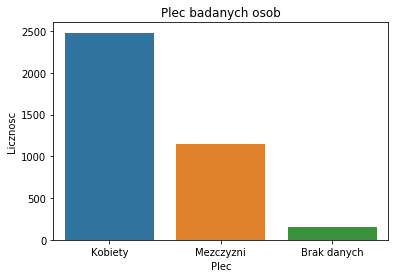

In [124]:
plot=sns.countplot(data.sex, dodge=False)
plot.set_title("Plec badanych osob")
plot.set(xticklabels=["Kobiety", "Mezczyzni", "Brak danych"], xlabel="Plec", ylabel="Licznosc")

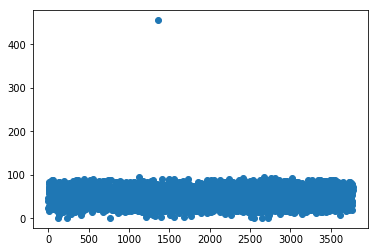

In [125]:
plt.plot(data.age, 'o')
#PP: Dziwna wartość danych 

In [126]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


### PP: Maksymalny wiek to 455?


In [128]:
data[data.age == 455]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,Thyroid_disease
1364,455.0,F,False,False,False,False,False,False,False,False,...,False,False,1.1,2.0,118.0,1.13,104.0,NaN,SVI,False


### PP: Wiemy, że w kolumnie age jest jedna wartość NA


In [129]:
data[data.age.isna()]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,referral_source,Thyroid_disease
1985,NaN,F,True,False,False,False,False,False,True,False,...,False,False,0.6,1.5,120.0,0.82,146.0,NaN,other,False


### PP: Skoro są braki danych w wieku i wartości równe 455, czy to znaczy, że wiek uzupełniali sami pacjenci? 


In [131]:
data2 = data[data["age"]<455]
data2.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3770.000000,3401.000000,3001.000000,3539.000000,3383.000000,3385.000000,0.0
mean,51.628912,5.089258,2.013675,108.313309,0.995012,110.461064,NaN
std,18.982990,24.528465,0.827657,35.613396,0.195478,33.093651,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,87.500000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,94.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


### PP: Bez wartości 455, max wiek jest realny do osiągnięcia, zobaczmy wykres tego

[Text(0.5,0,'Wiek')]

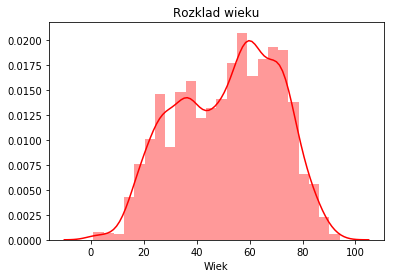

In [133]:
age_dens = sns.distplot(data2.age, hist = True, color='red')
age_dens.set_title('Rozklad wieku')
age_dens.set(xlabel="Wiek")

In [134]:
female = data2[data2.sex=="F"]
female_age=female["age"]
male = data2[data2.sex=="M"]
male_age = male["age"]

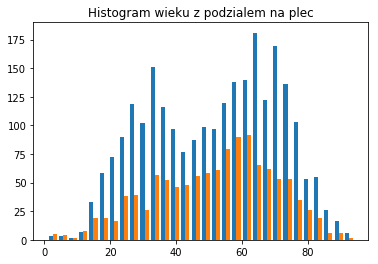

In [136]:
plt.hist([female.age, male.age], bins = 30)
plt.title("Histogram wieku z podzialem na plec")
plt.show()

### PP: Średnia wieku to 54,dzięki wykresowi wiemy, że najwięcej jest osób koło 60
### Skoro pojawiła się dziwna wartość wieku to warto spojrzeć raz jeszcze na zbiór i sprawdzić czy w innych kolumnach nie ma takich zakłamań


In [138]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


## Sprawdzanie wartości w kolumnach continous - trochę biologii

Zacznijmy od TSH (tyreotropiny), wedle internetu norma wynosi od 0,32 do 4 albo 5 mIU/I
(nie wliczając dzieci i kobiet w ciąży, u nich są inne), ale przeczytałam, że jakiś facet miał 400, więc zakładam, że mozliwe są wyższe

T3 - (trijodotyronina) T3 całkowita (TT3) norma 1,3–3,1 nmol/l, T3 wolna (FT3) norma 4,0–7,8 pmol/l, zakładam, że
może chodzić o wolne T3, bo całkowite T4 jest podpisane dokładnie tym co znaczy, tutaj niezbyt

TT4 - (tyroksyna) czyli T4 całkowita, norma 58–154 nmol/l

###  TSH pobudza tarczycę do produkcji T4 i T3, może warto sprawdzić korelacje !!!!!!!!!!

T4U - Wykorszystanie tyroksyny przez organizm (eksploatacja, pobór)

FTI - wolny testosteron, wiarygodny indeks do oceniania stanu tarczycy, FTI = Thyroxine (T4)/Thyroid Binding Capacity

TBG - stężenie globuliny wiążącej tyroksynę, nie mamy danych, więc nie doszukuję więcej informacji

## Braki danych - znalezienie ich (bez robienia z nimi czegokolwiek)

### PP: Hormony mogą mieć różne wartości, nawet abstrakcyjnie duże, więc załóżmy, że dane są w porządku
### W takim razie pora na braki danych


In [139]:
NA_ratio_columns = data.isnull().mean()
NA_ratio_columns.round(4) * 100

age                            0.03
sex                            0.00
on_thyroxine                   0.00
query_on_thyroxine             0.00
on_antithyroid_medication      0.00
sick                           0.00
pregnant                       0.00
thyroid_surgery                0.00
I131_treatment                 0.00
query_hypothyroid              0.00
query_hyperthyroid             0.00
lithium                        0.00
goitre                         0.00
tumor                          0.00
hypopituitary                  0.00
psych                          0.00
TSH                            9.78
T3                            20.39
TT4                            6.12
T4U                           10.26
FTI                           10.21
TBG                          100.00
referral_source                0.00
Thyroid_disease                0.00
dtype: float64

In [140]:
data[data.sex == "Missing"].sex.count()

150

## PP: Krótkie podsumowanko:
* age ma dwie wartości dziwne - NaN i 455, co zrobić z nimi?
* sex ma 150 wartości NaN, tylko zostały zamienione na "Missing", uwaga przy pracy nad nimi!
* TBG ma same NaN, proponuję usunąć, nic z niego nie wyciągniemy
* reszta wartości w porządku, NaN pojawiają się w wartościach continous, można uzupełnić (imputacja braków danych)
* dwie kolumny o typach object, reszta bool albo float

* data z usuniętymi brakami przy age i kolumną TBG to data2!!!

## Korelacje zmiennych

### PP: hormony mogą mieć jakieś korelacje, więc spójrzmy na to


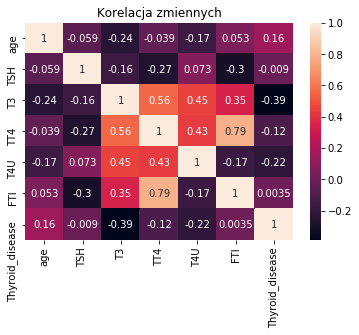

In [141]:
correlation = data.iloc[:, np.r_[0, 16:21, 23]].corr()
#Korelacja dla tylko zmiennych ciągłych + target (za dużo wszystkich zmiennych aby można było odczytać coś)
ax=sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
ax.set_title('Korelacja zmiennych')

plt.show()

### PP: Przykładowe wnioski z wykresu korelacji:
* wysoka korelacja zachodzi między TT4 a FTI, ale wiemy już daleczego, wskaźnik FTI wylicza się z TT4
* spadek T3 wpływa na niedoczynność tarczycy, w sumie to wszystkie hormony mają ujemną korelację, a wzrost wieku sprzyja chorobom tarczyc
* TT4 i T3 mają dodatnią korelację i to całkiem dużą (ciekawa zależność między nimi a TSH, wszystkie są w jakiejś zależności od siebie - szczegóły w internecie)
* T4U korelacja dodatnia, dość spora z powyższymi
* powyższe dwa punkty, to hormony wytwarzane przez tarczyce, niż zależności mogły być do przewidzenia

## Rozkłady zmiennych - także parami:

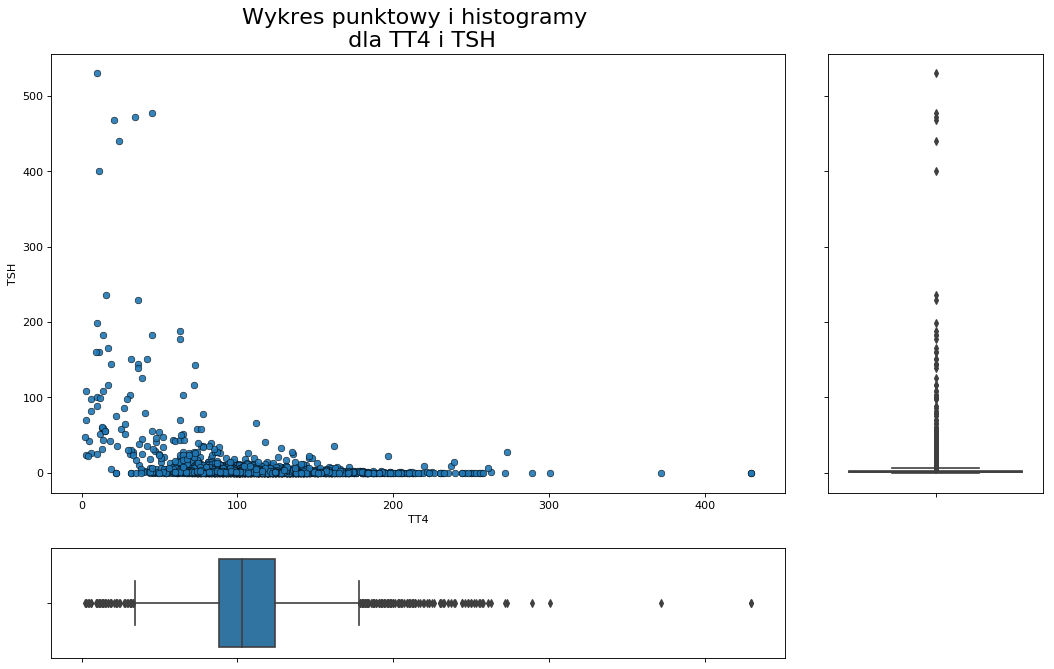

In [142]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
ax_main.scatter('TT4', 'TSH', alpha=.9, data=data, cmap="Set1", edgecolors='black', linewidths=.5)
sns.boxplot(data.TSH, ax=ax_right, orient="v")
sns.boxplot(data.TT4, ax=ax_bottom, orient="h")
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')
ax_main.set(title='Wykres punktowy i histogramy \n dla TT4 i TSH', xlabel='TT4', ylabel='TSH')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(10)
plt.show()

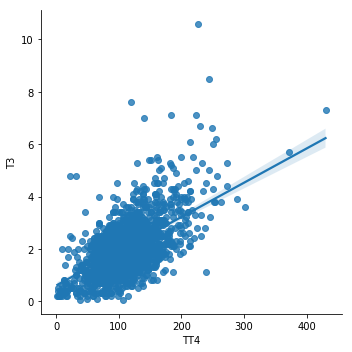

In [143]:
sns.lmplot(x='TT4', y='T3', data=data)

[None,
 Text(0,0.5,'TSH '),
 [Text(0,0,'kobiety'), Text(0,0,'mezczyzni'), Text(0,0,'brak danych o plci')]]

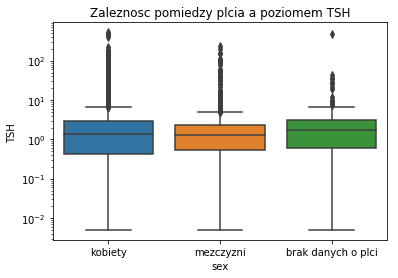

In [144]:
plot = sns.boxplot(data.sex, data.TSH)
plot.set_title('Zaleznosc pomiedzy plcia a poziomem TSH')
plot.set(xticklabels=["kobiety","mezczyzni","brak danych o plci"], yscale="log", ylabel="TSH ")

### AG: Skalowanie logarytmiczne dodane z powodu dużego zróżnicowania poziomu TSH (zazwyczaj jest on bardzo niski, ale zdarzają się wyniki ok.400).
### Rozkład dosyć podobny niezależnie od płci. Wydaje się, że kobiety mają częściej wyższy poziom ale może to wynikać z faktu że więcej kobiet było badanych. 
### PK: Ciekawe jak to sie ma wobec testorenu:


[[Text(0,0,'kobiety'), Text(0,0,'mezczyzni'), Text(0,0,'brak danych o plci')]]

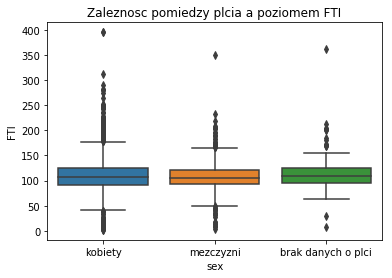

In [145]:
plot = sns.boxplot(data.sex, data.FTI)
plot.set_title('Zaleznosc pomiedzy plcia a poziomem FTI')
plot.set(xticklabels=["kobiety","mezczyzni","brak danych o plci"])

[[Text(0,0,'kobiety'), Text(0,0,'mezczyzni'), Text(0,0,'brak danych o plci')]]

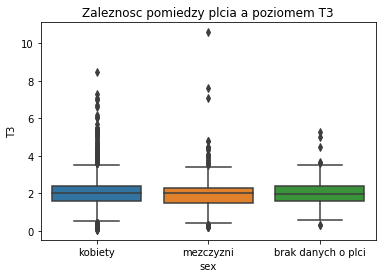

In [146]:
plot = sns.boxplot(data.sex, data.T3)
plot.set_title('Zaleznosc pomiedzy plcia a poziomem T3')
plot.set(xticklabels=["kobiety","mezczyzni","brak danych o plci"])

[[Text(0,0,'kobiety'), Text(0,0,'mezczyzni'), Text(0,0,'brak danych o plci')]]

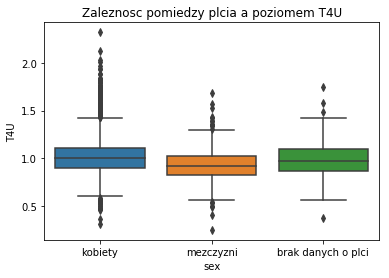

In [147]:
plot = sns.boxplot(data.sex, data.T4U)
plot.set_title('Zaleznosc pomiedzy plcia a poziomem T4U')
plot.set(xticklabels=["kobiety","mezczyzni","brak danych o plci"])

[[Text(0,0,'kobiety'), Text(0,0,'mezczyzni'), Text(0,0,'brak danych o plci')]]

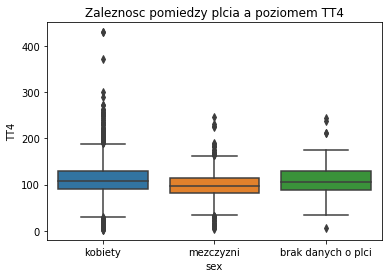

In [148]:
plot = sns.boxplot(data.sex, data.TT4)
plot.set_title('Zaleznosc pomiedzy plcia a poziomem TT4')
plot.set(xticklabels=["kobiety","mezczyzni","brak danych o plci"])

### AG: Wydaje się, że na poziom większości hormonów płec nie ma większego wpływu

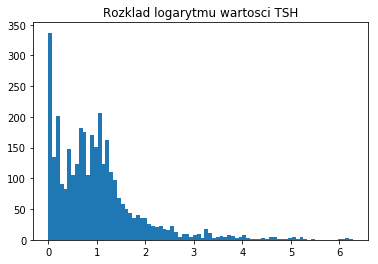

In [149]:
TSH_log = np.log1p(data.TSH)
TSH_log = TSH_log[~np.isnan(TSH_log)]
plt.hist(TSH_log, bins = 80)
plt.title("Rozklad logarytmu wartosci TSH")
plt.show()